# Data Preprocessing - Cleaning and Feature Engineering

#### Import Statements and Loading Dataset

In [27]:
#necessary import statements and dataset loading
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("./train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Initial Exploration

In [28]:
#summary of dataset and N/A and Null values identification
print(df.info())
print(df.isnull().sum()+df.isna().sum())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

#### Initial Histogram - Exploratory Analysis

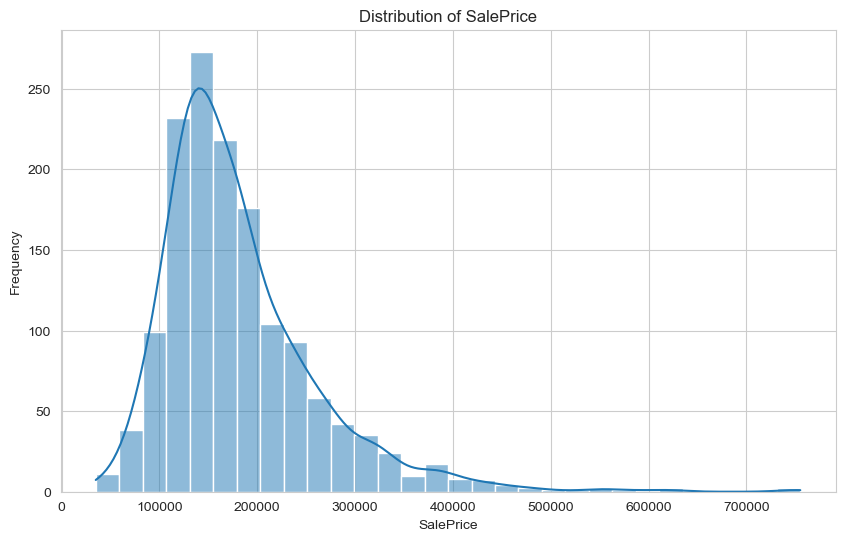

Descriptive Statistics for SalePrice:
count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


In [29]:
# initial plot histogram for 'SalePrice' (response) variable
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], bins=30, kde=True)
plt.title("Distribution of SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Frequency")
plt.show()

# Descriptive statistics for the response variables
print("Descriptive Statistics for SalePrice:")
print(df['SalePrice'].describe())

#### Missing Values Handling

In [30]:
# total null / missing value counts
missing_vals = df.isnull().sum()

#dropping cols with >200 missing values - want to reduce noise and irrelevant features
cols_to_drop = missing_vals[missing_vals > 200].index.tolist()
df.drop(columns=cols_to_drop, inplace=True)
print(missing_vals[missing_vals > 0])

#numerical columns replaced with the median
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[num_cols]=df[num_cols].fillna(df[num_cols].median()) #replace with median
print(num_cols)

#cat cols - replaced with 'None' string value 
cat_cols = df.select_dtypes(include=['object']).columns
df[cat_cols]=df[cat_cols].fillna('None') #replace with 'None'
print(cat_cols)

print(missing_vals[missing_vals > 0])

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64
Index(['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index

#### Feature Engineering

In [31]:
#feature construction (3 different new features)
df['HouseAge'] = df['YrSold'] - df['YearBuilt'] # age of the house at time of sale
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) #combines full and half
df['RoomAreaRatio'] = df['GrLivArea'] / df['TotRmsAbvGrd'] # ratio metric
#feature selection in model building will confirm redundancy of original features

#### Restricting Data to Certain Conditions

In [32]:
# filtering for observations wityh Normal Sale Condition and WD Sale Type
df_cleaned = df[(df['SaleCondition'] == "Normal") & (df['SaleType']=="WD")]

# Dropping any unnecessary columns
df_cleaned = df_cleaned.drop(['Id', 'SaleCondition', 'SaleType', 'GarageYrBlt', 'MasVnrArea'], axis=1)
cat_cols = df_cleaned.select_dtypes(include=['object']).columns #recalling cat cols
print(df_cleaned)

      MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0             60       RL     8450   Pave      Reg         Lvl    AllPub   
1             20       RL     9600   Pave      Reg         Lvl    AllPub   
2             60       RL    11250   Pave      IR1         Lvl    AllPub   
4             60       RL    14260   Pave      IR1         Lvl    AllPub   
5             50       RL    14115   Pave      IR1         Lvl    AllPub   
...          ...      ...      ...    ...      ...         ...       ...   
1455          60       RL     7917   Pave      Reg         Lvl    AllPub   
1456          20       RL    13175   Pave      Reg         Lvl    AllPub   
1457          70       RL     9042   Pave      Reg         Lvl    AllPub   
1458          20       RL     9717   Pave      Reg         Lvl    AllPub   
1459          20       RL     9937   Pave      Reg         Lvl    AllPub   

     LotConfig LandSlope Neighborhood  ... 3SsnPorch ScreenPorch PoolArea  \
0       In

#### Hot-Encoding Dummy Variables

In [33]:
# One-hot encoding using OneHotEncoder - to avoid dummy variable issue
from sklearn.preprocessing import OneHotEncoder
encode = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_cols = encode.fit_transform(df_cleaned[cat_cols])
encoded_df = pd.DataFrame(encoded_cols, columns=encode.get_feature_names_out(cat_cols))

#concatenating dataframes together
df_cleaned = pd.concat([df_cleaned.drop(columns=cat_cols), encoded_df], axis=1)

num_cols = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
df_cleaned[num_cols]=df_cleaned[num_cols].fillna(df_cleaned[num_cols].median()) #replace with median

cat_cols = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[cat_cols]=df_cleaned[cat_cols].fillna('None') #replace with 'None'

#validating one-hot encoding:
print(f"Number of columns after encoding: {df_cleaned.shape[1]}")
print(f"Sample of encoded columns: {df_cleaned.columns[:10]}")
print(df_cleaned.dtypes.unique())
print(df_cleaned.isna().sum())

Number of columns after encoding: 255
Sample of encoded columns: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF'],
      dtype='object')
[dtype('float64')]
MSSubClass       0
LotArea          0
OverallQual      0
OverallCond      0
YearBuilt        0
                ..
GarageCond_Po    0
GarageCond_TA    0
PavedDrive_N     0
PavedDrive_P     0
PavedDrive_Y     0
Length: 255, dtype: int64


#### Removing 0 Variance Features

In [34]:
#removes the features with very low variance - provide little additional information for model
low_var_feat = df_cleaned.var().sort_values(ascending=True)
low_var_feat = low_var_feat[low_var_feat.values < 0.009]
low_var_feat = [item for item in low_var_feat.index]
df_cleaned = df_cleaned.drop(low_var_feat, axis=1)

#### TO CSV

In [35]:
df_cleaned.to_csv("./df_cleaned_new2.csv", index=False) #to csv for use in other files
df_cleaned.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageFinish_Unf,GarageQual_Fa,GarageQual_None,GarageQual_TA,GarageCond_Fa,GarageCond_None,GarageCond_TA,PavedDrive_N,PavedDrive_P,PavedDrive_Y
0,60.0,8450.0,7.0,5.0,2003.0,2003.0,706.0,0.0,150.0,856.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
1,20.0,9600.0,6.0,8.0,1976.0,1976.0,978.0,0.0,284.0,1262.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,60.0,11250.0,7.0,5.0,2001.0,2002.0,486.0,0.0,434.0,920.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
4,60.0,14260.0,8.0,5.0,2000.0,2000.0,655.0,0.0,490.0,1145.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
5,50.0,14115.0,5.0,5.0,1993.0,1995.0,732.0,0.0,64.0,796.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
